<div align="center">
    <img src="https://raw.githubusercontent.com/GabrieleAraujo/database-data-mining/main/icon/Ufopa_braso_PNG_fundo_transparente.png" width="15%">
    <img src="https://raw.githubusercontent.com/GabrieleAraujo/database-data-mining/main/icon/LACA_Logo_HQ_Minimalista.png" width="15%">
</div>

## Market Basket Analysis in Data Mining
#### Professor:  Fábio Lobato - https://fabiolobato.github.io/
#### Assistant: Gabriele Araújo - [Linkedin](https://www.linkedin.com/in/gabrielesaraujo/)
#### Federal University of Western Pará

<!-- </br>

<img src="https://raw.githubusercontent.com/GabrieleAraujo/database-data-mining/main/icon/members-grep.comp4.png" width="100%">

</br> -->

***



Repositories used for inspiration of this material: </br>
- [Market-basket-analysis - Xavier](https://www.kaggle.com/code/xvivancos/market-basket-analysis/)
- [Market-basket-analysis - Nagadia](https://www.kaggle.com/code/meetnagadia/market-basket-analysis/)




# Market Basket Analysis

*Market Basket Analysis* é uma técnica de data mining que faz uso de regras de associação para identificar os hábitos de compra dos clientes, fornecendo uma visão da combinação de produtos dentro das cestas de compras dos clientes analisados.

As regras de associação têm como premissa básica encontrar elementos que implicam na presença de outros elementos em uma mesma transação, ou seja, encontrar relacionamentos ou padrões frequentes entre conjuntos de dados.


<center>

| Transaction   | Items                                       |
|:--------------|:--------------------------------------------|
| t1            | {T-shirt, Trousers, Belt}                   |
| t2            | {T-shirt, Jacket}                           |   
| t3            | {Jacket, Gloves}                            |  
| t4            | {T-shirt, Trousers, Jacket}                 |
| t5            | {T-shirt, Trousers, Sneakers, Jacket, Belt} |   
| t6            | {Trousers, Sneakers, Belt}                  |
| t7            | {Trousers, Belt, Sneakers}                  |

</center>  

Na tabela acima, podemos ver sete transações de uma loja de roupas. Cada transação mostra os itens comprados naquela transação. Podemos representar nossos itens como um conjunto de itens da seguinte maneira:

$$I=\{i_1, i_2,..., i_k\}$$


No nosso caso, isso corresponde a:

$$I=\{T\text- shirt, Trousers, Belt, Jacket, Gloves, Sneakers\}$$

A **transaction** is represented by the following expression:

$$T=\{t_1, t_2,..., t_n\}$$

Por exemplo,

$$t_1=\{T\text- shirt, Trousers, Belt\}$$

Então, uma **regra de associação** é definida como uma implicação da forma:

<center> $X \Rightarrow Y$, where $X \subset I$, $Y \subset I$ and $X \cap Y = 0$ </center>

Por exemplo,

$$\{T\text- shirt, Trousers\} \Rightarrow \{Belt\}$$

Nas seções seguintes, vamos definir quatro métricas para medir a precisão de uma regra:

## Support

O Suporte é uma indicação de com que frequência o conjunto de itens aparece no conjunto de dados.

$$supp(X \Rightarrow Y)=\dfrac{|X \cup Y|}{n}$$

Em outras palavras, é o número de transações com ambos $X$ e $Y$ dividido pelo número total de transações. As regras não são úteis para valores baixos de suporte.

## Confidence

Para uma regra $X \Rightarrow Y$, a confiança mostra a porcentagem em que $Y$ é comprado com $X$. É uma indicação de com que frequência a regra foi considerada verdadeira.

$$conf(X \Rightarrow Y)=\dfrac{supp(X \cup Y)}{supp(X)}$$

Por exemplo, a regra $T\text- shirt \Rightarrow Trousers$ tem uma confiança de 3/4, o que significa que em 75% das transações que contêm uma camiseta, a regra é correta (75% das vezes que um cliente compra uma camiseta, também compra calças).

## Lift

O lift de uma regra é a razão entre o suporte observado e o suporte esperado se $X$ e $Y$ fossem independentes, e é definido como:

$$lift(X \Rightarrow Y)=\dfrac{supp(X \cup Y)}{supp(X)supp(Y) }$$


Valores de lift maiores indicam associações mais fortes.

<!-- ## Conviction

A convicção de uma regra é definida como:

$$conv(X \Rightarrow Y)=\dfrac{1-supp(Y)}{1-conf(X \Rightarrow Y) }$$

Pode ser interpretada como a razão entre a frequência esperada de ocorrência de $X$ sem $Y$, se $X$ e $Y$ fossem independentes, dividida pela frequência observada de previsões incorretas. Um valor alto significa que o consequente depende fortemente do antecedente. -->

Se você deseja obter mais informações sobre essas medidas, por favor, consulte [aqui](https://en.wikipedia.org/wiki/Association_rule_learning).

# Importing libraries

In [2]:
#Mlxtend (machine learning extensions) is a Python library of useful tools for the day-to-day data science tasks.
!pip install mlxtend


In [3]:
import numpy as np
import pandas as pd


# we need to install mlxtend on anaconda prompt by typing 'pip install mlxtend'
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# graph
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

# Loading Data

> We will use a dataset containing transactions from a bakery to apply the algorithm and find combinations of products that are purchased together. Let's start!


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/GabrieleAraujo/database-data-mining/main/BreadBasket_DMS.csv')

In [5]:
df

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


# Cleaning the data

Each row in the table above represents an item in a transaction. Some rows may contain missing values. Let's eliminate these lines!

In [6]:
df.isnull().any()

Date           False
Time           False
Transaction    False
Item           False
dtype: bool

In [7]:
df.loc[df['Item']=='NONE', :]

,Date,Time,Transaction,Item
26,2016-10-30,10:27:21,11,NONE
38,2016-10-30,10:34:36,15,NONE
39,2016-10-30,10:34:36,15,NONE
66,2016-10-30,11:05:30,29,NONE
80,2016-10-30,11:37:10,37,NONE
...,...,...,...,...
21108,2017-04-08,11:54:22,9590,NONE
21122,2017-04-08,12:58:25,9599,NONE
21254,2017-04-09,12:01:07,9666,NONE
21255,2017-04-09,12:04:13,9667,NONE


In [8]:
def cleanup_dataset(df):
    # Returns new dataset without NONE values in specified c
    df_none_entries = df.loc[df['Item']=='NONE',:]
    return df.drop(df_none_entries.index)

dataset = cleanup_dataset(df)
dataset

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


We might want to focus in on each of these aspects seperatly. So let's make a list of transactions and a seperate list of items!

In [9]:
list_of_transactions = dataset[['Transaction', 'Date', 'Time']].drop_duplicates()
list_of_transactions

,Transaction,Date,Time
0,1,2016-10-30,09:58:11
1,2,2016-10-30,10:05:34
3,3,2016-10-30,10:07:57
6,4,2016-10-30,10:08:41
7,5,2016-10-30,10:13:03
...,...,...,...
21281,9680,2017-04-09,14:24:03
21282,9681,2017-04-09,14:30:09
21286,9682,2017-04-09,14:32:58
21290,9683,2017-04-09,14:57:06


# Setting up some auxillary functions

Here are a few functions that will make it easier for us to interact with our dataframes:

The Date and Time headings encode many different pieces of information. Splitting up this information is gonna make it easier for us to group data points.

## Date

In [10]:
def split_date_field(df_orig):
    """
    Converts the Date Column into three separate columns
    (YYYY-MM-DD) -> (YYYY, MM, DD)
    """
    df = df_orig.copy()
    date = pd.to_datetime(df['Date'])

    df['Year'] = date.dt.year
    df['Month'] = date.dt.month
    df['Day'] = date.dt.day

    month_map = {
        1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
        5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
        9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
    }
    df['Month'] = df['Month'].map(month_map)

    weekday_map = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    df['Weekday'] = date.dt.weekday.apply(lambda x: weekday_map[x])

    return df
df_with_dates = split_date_field(dataset)
df_with_dates.head()

,Date,Time,Transaction,Item,Year,Month,Day,Weekday
0,2016-10-30,09:58:11,1,Bread,2016,Oct,30,Sun
1,2016-10-30,10:05:34,2,Scandinavian,2016,Oct,30,Sun
2,2016-10-30,10:05:34,2,Scandinavian,2016,Oct,30,Sun
3,2016-10-30,10:07:57,3,Hot chocolate,2016,Oct,30,Sun
4,2016-10-30,10:07:57,3,Jam,2016,Oct,30,Sun


## Time

In [11]:
def split_time_field(df_orig):
    """
    Converts the Date Column into three sepreate columns

    (HH-MM-SS) -> (HH, MM, SS)
    """
    df = df_orig.copy()
    df['Hours'], df['Mins'], df['Secs'] = df['Time'].str.split(':').str
    return df

df_with_time = split_time_field(dataset)
df_with_time.head()

,Date,Time,Transaction,Item,Hours,Mins,Secs
0,2016-10-30,09:58:11,1,Bread,09,58,11
1,2016-10-30,10:05:34,2,Scandinavian,10,05,34
2,2016-10-30,10:05:34,2,Scandinavian,10,05,34
3,2016-10-30,10:07:57,3,Hot chocolate,10,07,57
4,2016-10-30,10:07:57,3,Jam,10,07,57


# Understanding the data
Now we can use the data to answer some real questions!

## How many transactions took place?

In [12]:
dataset['Transaction'].nunique()

9465

## How many items are in the basket?

In [13]:
dataset['Item'].nunique()

94

## What are the most popular items?

In [14]:
transaction_count = dataset.groupby(by='Item')[['Transaction']].count().sort_values(by='Transaction', ascending=False)
transaction_count.head(10)

,Transaction
Item,
Coffee,5471
Bread,3325
Tea,1435
Cake,1025
Pastry,856
Sandwich,771
Medialuna,616
Hot chocolate,590
Cookies,540


In [15]:
def convert_to_percentage(x):
    return 100 * x / float(x.sum())

transaction_percentage = transaction_count.apply(convert_to_percentage)
transaction_percentage.head()

,Transaction
Item,
Coffee,26.678695
Bread,16.213976
Tea,6.997611
Cake,4.998293
Pastry,4.174184


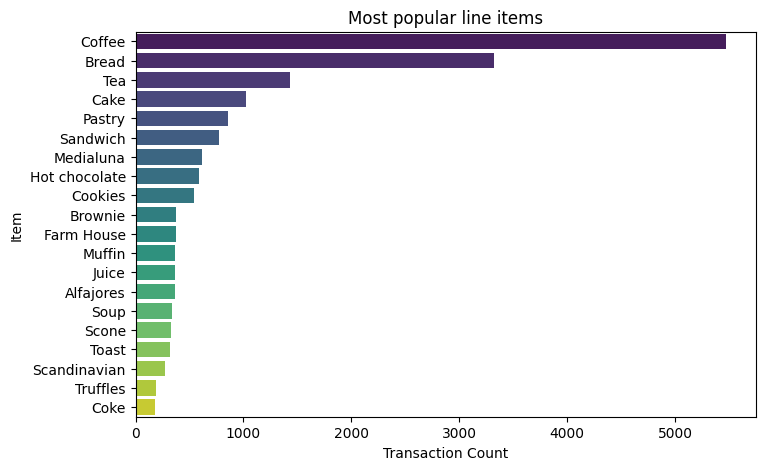

In [16]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Transaction', y=transaction_count.index[:20], data=transaction_count.head(20), palette='viridis')
plt.title('Most popular line items')
plt.xlabel('Transaction Count')
plt.ylabel('Item')
plt.show()

# Time distribution Transactions
Let’s display some other visualizations describing the time distribution

## Transactions per day

In [17]:
# To correct the order in graphs
order_month = ('Jan', 'Feb', 'Mar','Apr','Oct', 'Nov', 'Dec')
order_weekday = ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun')

In [18]:
# Count of items per day (month and day of the week), with ordering of the days of the week
item_count_by_day = (df_with_dates.groupby(['Month', 'Weekday']).size().reset_index(name='Transaction'))
item_count_by_day['Weekday'] = pd.Categorical(item_count_by_day['Weekday'], categories=order_weekday, ordered=True)

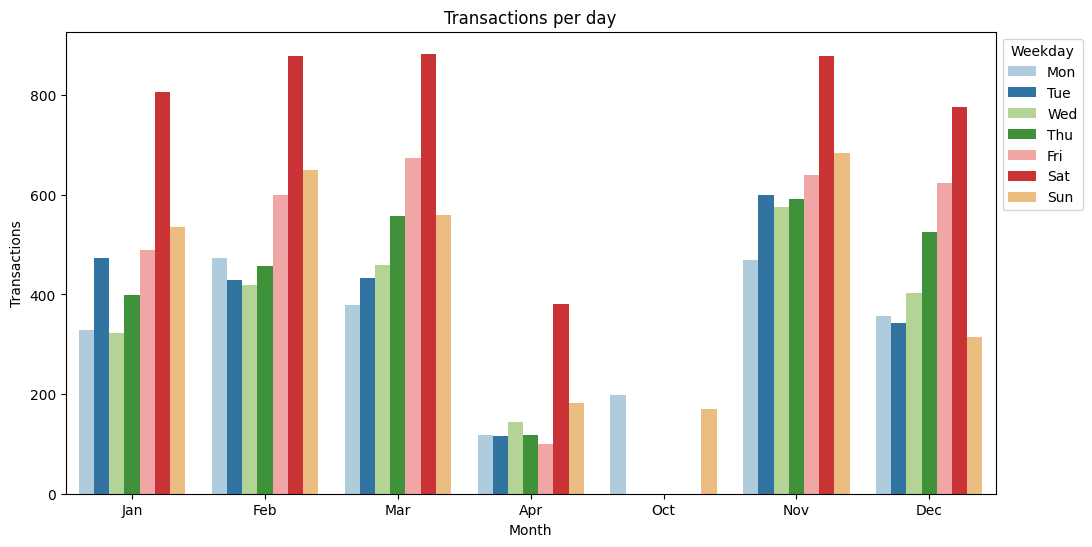

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Transaction', hue='Weekday', data=item_count_by_day, palette = 'Paired', order = order_month )
plt.title('Transactions per day')
plt.xlabel('Month')
plt.ylabel('Transactions')
plt.legend(title='Weekday', bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.show()

The data set includes dates from 30/10/2016 to 09/04/2017, that’s why we have so few transactions in October and April.

## Transactions per Month

In [20]:
# Unique count of transactions per month, sorted in descending order
count_month = df_with_dates.groupby('Month')['Transaction'].nunique().sort_values(ascending=False).reset_index()

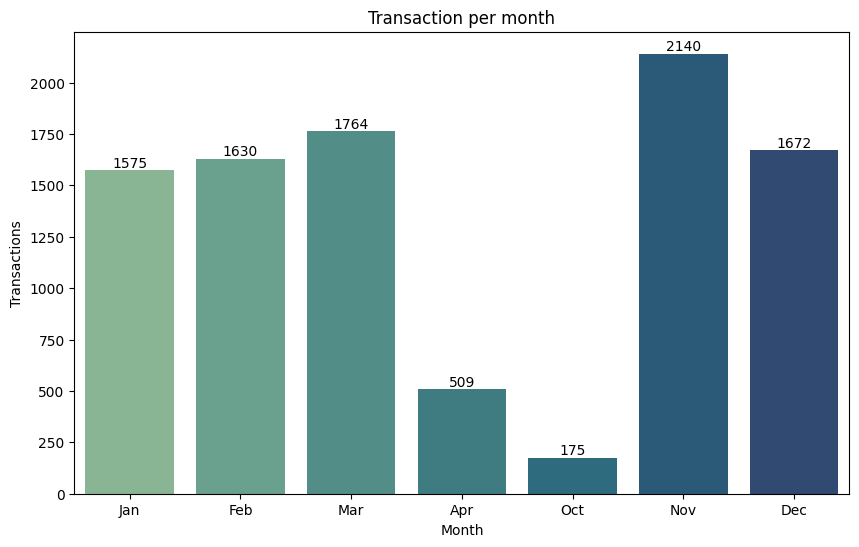

In [21]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Month', y='Transaction', data=count_month, palette='crest', order = order_month)
plt.title('Transaction per month')
plt.xlabel('Month')
plt.ylabel('Transactions')

for i in ax.containers:
    ax.bar_label(i)

plt.show()

## Transactions per weekday

In [22]:
count_weekday = df_with_dates.groupby('Weekday')['Transaction'].nunique().sort_values(ascending=False).reset_index()

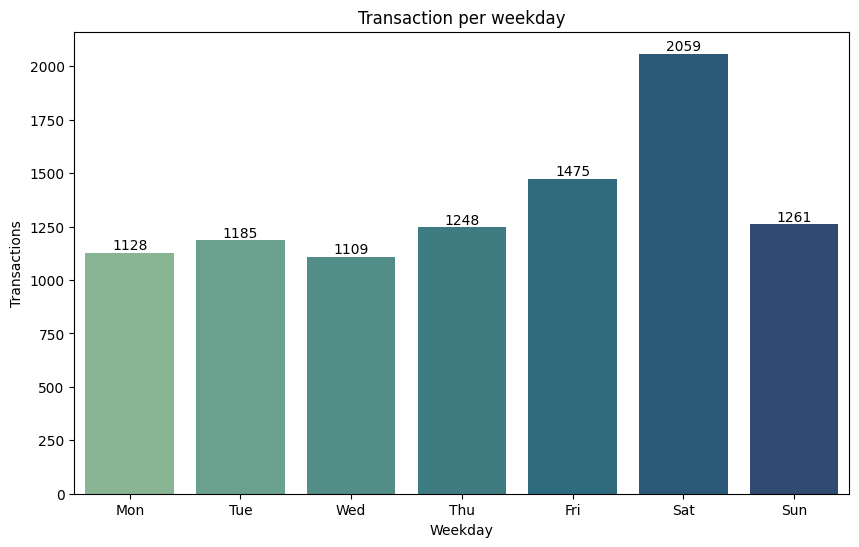

In [23]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Weekday', y='Transaction', data=count_weekday, palette='crest', order = order_weekday)
plt.title('Transaction per weekday')
plt.xlabel('Weekday')
plt.ylabel('Transactions')

for i in ax.containers:
    ax.bar_label(i)


plt.show()

As we can see, Saturday is the busiest day in the bakery. Conversely, Wednesday is the day with fewer transactions.

## Transactions per hour

In [24]:
df_with_time.head()

,Date,Time,Transaction,Item,Hours,Mins,Secs
0,2016-10-30,09:58:11,1,Bread,09,58,11
1,2016-10-30,10:05:34,2,Scandinavian,10,05,34
2,2016-10-30,10:05:34,2,Scandinavian,10,05,34
3,2016-10-30,10:07:57,3,Hot chocolate,10,07,57
4,2016-10-30,10:07:57,3,Jam,10,07,57


In [25]:
count_hours = df_with_time.groupby('Hours')['Transaction'].nunique().sort_values(ascending=False).reset_index()

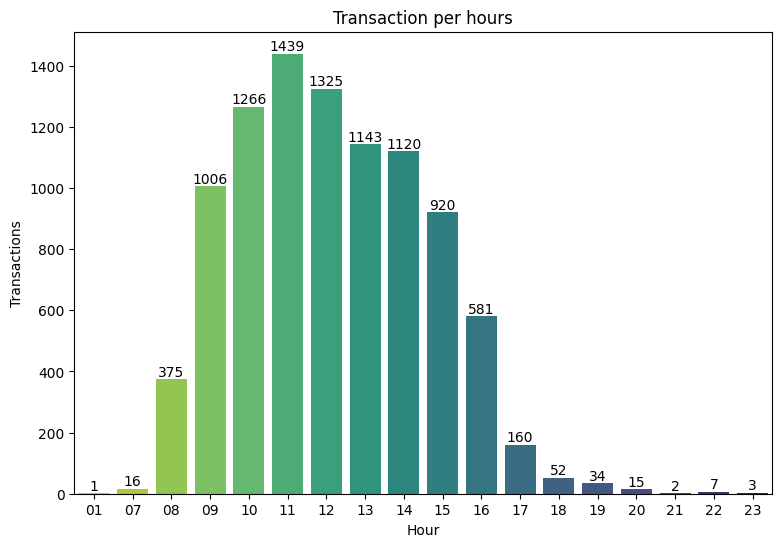

In [26]:
plt.figure(figsize=(9, 6))

ax = sns.barplot(x='Hours', y='Transaction', data=count_hours.sort_values(by='Hours'), palette='viridis_r')
plt.title('Transaction per hours')
plt.xlabel('Hour')
plt.ylabel('Transactions')

for i in ax.containers:
    ax.bar_label(i)

plt.show()

# Apriori algorithm

O algoritmo Apriori gera regras de associação para um conjunto de dados específico. Uma regra de associação implica que se um item A ocorre, então o item B também ocorre com uma certa probabilidade.

O primeiro passo para criar um conjunto de regras de associação é determinar os limiares ideais para suporte e confiança. Se definirmos esses valores muito baixos, o algoritmo levará mais tempo para ser executado e obteremos muitas regras (a maioria delas não será útil). Então, quais valores escolher? Podemos experimentar diferentes valores de suporte e confiança e visualizar graficamente quantas regras são geradas para cada combinação.


## Starting preparation of df for receiving product association

We will create a unique representation of purchased products, where each row is a transaction, each column is a product, and the values indicate the quantity of each product in a transaction.

In [27]:
# One-hot representation of products purchased
dataset['Quantity'] = 1
dataset.head()

,Date,Time,Transaction,Item,Quantity
0,2016-10-30,09:58:11,1,Bread,1
1,2016-10-30,10:05:34,2,Scandinavian,1
2,2016-10-30,10:05:34,2,Scandinavian,1
3,2016-10-30,10:07:57,3,Hot chocolate,1
4,2016-10-30,10:07:57,3,Jam,1


In [28]:
basket = dataset.groupby(['Transaction', 'Item'])['Quantity'].sum().unstack().fillna(0)
basket

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are a lot of zeros in the data but we also need to make sure any positive values are converted to a 1 and anything less the 0 is set to 0. This step will complete the one hot encoding of the data

In [29]:
# Define a function to encode values into binary (0 or 1)
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

In [30]:
basket_sets

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can try different values of support and confidence and see graphically how many rules are generated for each combination.

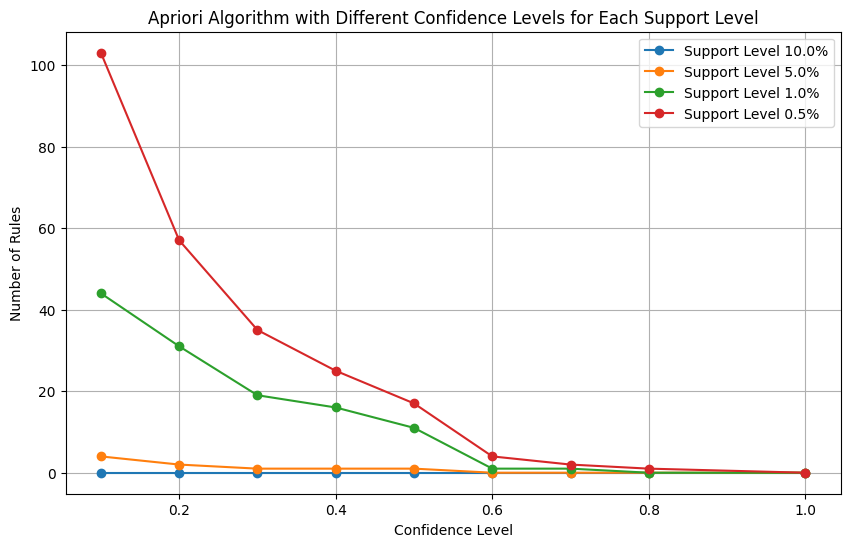

In [31]:
def apriori_confidence_levels(data, support_levels, confidence_levels):
    rule_counts = []

    for support_level in support_levels:
        current_rule_counts = []
        for confidence_level in confidence_levels:
            rules = association_rules(apriori(data, min_support=support_level, use_colnames=True), metric='confidence', min_threshold=confidence_level)
            current_rule_counts.append(len(rules))
        rule_counts.append(current_rule_counts)

    return rule_counts

def plot_confidence_levels(support_levels, confidence_levels, rule_counts):
    plt.figure(figsize=(10, 6))

    for i, support_level in enumerate(support_levels):
        plt.plot(confidence_levels, rule_counts[i], marker='o', label=f'Support Level {support_level*100}%')

    plt.title("Apriori Algorithm with Different Confidence Levels for Each Support Level")
    plt.xlabel('Confidence Level')
    plt.ylabel('Number of Rules')
    plt.legend()
    plt.grid(True)
    plt.show()


support_levels = [0.1, 0.05, 0.01, 0.005]
confidence_levels = [1.0, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

rule_counts = apriori_confidence_levels(basket_sets, support_levels, confidence_levels)
plot_confidence_levels(support_levels, confidence_levels, rule_counts)

Support level of 1%. We started to get dozens of rules, of which 13 have a confidence of at least 50%. To sum up, we are going to use a support level of 1% and a confidence level of 50%.

We can change the min_support value from 0 to 1, default value if 0.5, but as our support values are less than 0.5, to include more datasets. According to the graph above, the values of min_support = 0.01 and min_threshold=0.4

In [32]:
# The result is a table that lists the frequent sets and their relative frequency ('support').
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.036344,(Alfajores)
1,0.016059,(Baguette)
2,0.327205,(Bread)
3,0.040042,(Brownie)
4,0.103856,(Cake)
...,...,...
56,0.023666,"(Toast, Coffee)"
57,0.014369,"(Sandwich, Tea)"
58,0.010037,"(Cake, Coffee, Bread)"
59,0.011199,"(Coffee, Pastry, Bread)"


In [33]:
rules_sup1_conf50 = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)
rules_sup1_conf50

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
1,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
2,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
3,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
4,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
5,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
6,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
7,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
8,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
9,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851


## Visualizing the rules distribution color mapped

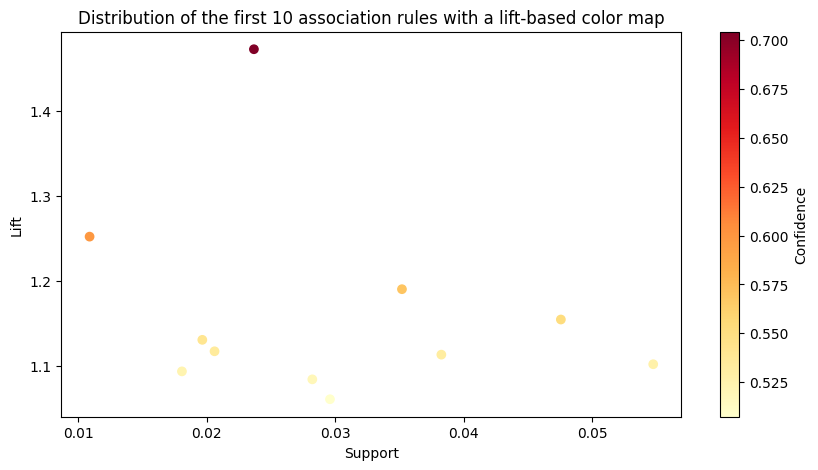

In [34]:
# Visualizing the rules distribution color mapped by Lift
plt.figure(figsize=(10, 5))
plt.scatter(rules_sup1_conf50['support'], rules_sup1_conf50['lift'], c=rules_sup1_conf50['confidence'], cmap='YlOrRd')
plt.title('Distribution of the first 10 association rules with a lift-based color map')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.colorbar(label = 'Confidence')
plt.show()

Based on the graph we have one or two points of interest with higher lift than the surrounding points:

In [35]:
rules_sup1_conf50[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False).head()

,antecedents,consequents,support,confidence,lift
10,(Toast),(Coffee),0.023666,0.704403,1.472431
9,(Spanish Brunch),(Coffee),0.010882,0.598837,1.251766
5,(Medialuna),(Coffee),0.035182,0.569231,1.189878
6,(Pastry),(Coffee),0.047544,0.552147,1.154168
0,(Alfajores),(Coffee),0.019651,0.540698,1.130235


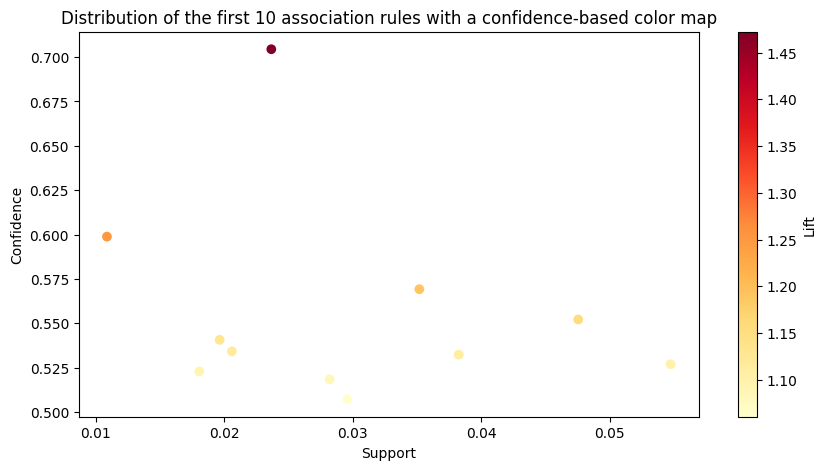

In [36]:
# Visualizing the rules distribution color mapped by confidence
plt.figure(figsize=(10, 5))
plt.scatter(rules_sup1_conf50['support'].head(13), rules_sup1_conf50['confidence'].head(13), c=rules_sup1_conf50['lift'].head(13), cmap='YlOrRd')
plt.title('Distribution of the first 10 association rules with a confidence-based color map')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar(label = 'Lift')
plt.show()

## Association between antecedents and consequents

Network graph to check the association between antecedents and consequents obtained after the association rule.

Font: https://plotly.com/python/network-graphs/

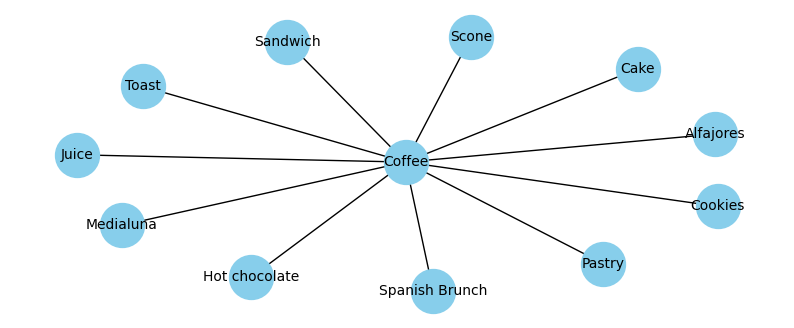

In [37]:
GA = nx.from_pandas_edgelist(rules_sup1_conf50, source='antecedents', target='consequents')

node_labels = {node: ', '.join(map(str, node)) for node in GA.nodes()}
fig, ax = plt.subplots(figsize=(10, 4))
nx.draw(GA, with_labels=True, labels=node_labels, font_size=10, font_color='black', node_size=1000, node_color='skyblue', ax=ax)
plt.show()


Graph of Association Rules with Support and Lift

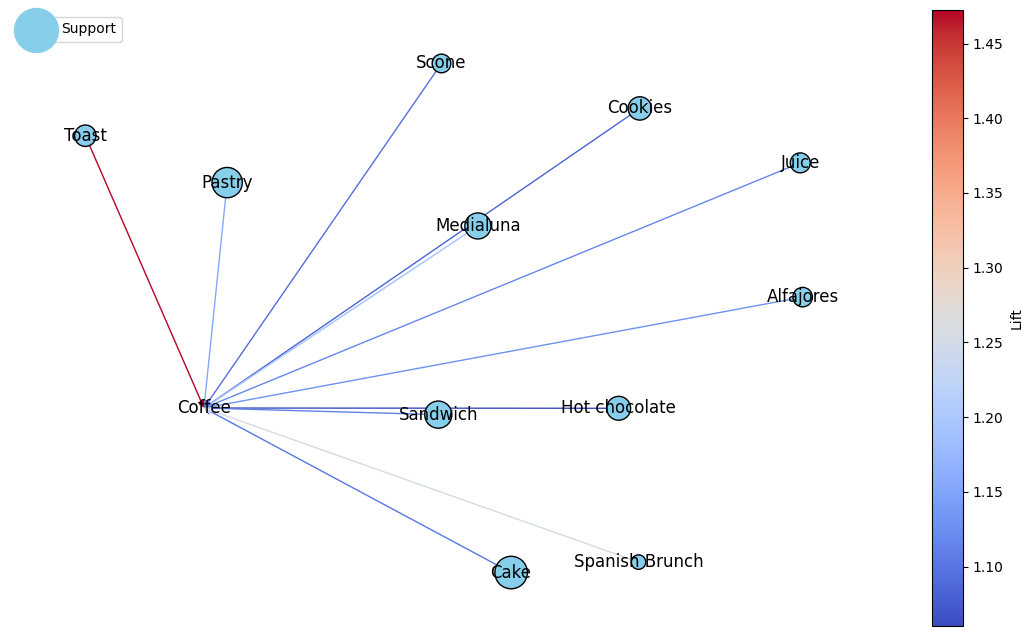

In [38]:
# based on lift
filtered_rules = rules_sup1_conf50[rules_sup1_conf50['lift'] > 1.0]
GA1 = nx.from_pandas_edgelist(filtered_rules, source='antecedents', target='consequents', create_using=nx.DiGraph())
GA = nx.relabel_nodes(GA1, {node: ', '.join(map(str, node)) for node in GA1.nodes()})

# support
node_sizes = [filtered_rules[filtered_rules['antecedents'] == set(node)]['support'].values[0] * 10000
              if len(filtered_rules[filtered_rules['antecedents'] == set(node)]) > 0 else 0 for node in GA1.nodes]
# lift
edge_colors = [filtered_rules[(filtered_rules['antecedents'] == set(edge[0])) & (filtered_rules['consequents'] == set(edge[1]))]['lift'].values[0]
               if len(filtered_rules[(filtered_rules['antecedents'] == set(edge[0])) & (filtered_rules['consequents'] == set(edge[1]))]) > 0 else 0 for edge in GA1.edges]

fig, ax = plt.subplots(figsize=(14, 8))
nx.draw(GA, with_labels=True, font_size=12, font_color='black', node_size=node_sizes, node_color='skyblue',
        edge_color=edge_colors, edge_cmap=plt.cm.coolwarm, ax=ax, width=1, edgecolors='black')
legend_handle = ax.scatter([], [], s=1000, color='skyblue', label='Support')

sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=plt.Normalize(vmin=min(edge_colors), vmax=max(edge_colors)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Lift')

plt.legend(handles=[legend_handle], loc='upper left')
plt.show()

# Exercícios
*   O que acontece quando diminuímos o nível de suporte? Por que?
*   O que acontece quando aumentamos o nível de confiança? Por que?
*   Como interpretar os resultados em termos de lift e qual seria um valor "bom" para o lift em um contexto específico?
*   Usando o conjunto de dados anterior, execute o algoritmo Apriori com um nível de suporte de 5% e um nível de confiança de 10%. As regras são interessantes? Por que?
*   Execute também o algoritmo Apriori com um nível de suporte de 0.5% e um nível de confiança de 60%. As regras são interessantes? Por que?



# Outros datasets para Market Basket Analysis/Association rules


*   [Groceries dataset](https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset/data)
*   [The Bread Basket
](https://www.kaggle.com/datasets/mittalvasu95/the-bread-basket)
*   [E-commerce Customer Data For Behavior Analysis](https://www.kaggle.com/datasets/shriyashjagtap/e-commerce-customer-for-behavior-analysis)
*  [Market_Basket_Optimisation](https://www.kaggle.com/datasets/andrewtoh78/market-basket-optimisation)
*  [Video Streaming Platforms](https://www.kaggle.com/datasets/utkarshsen/video-streaming-platforms/data)





# Outros algoritmos usados em Market Basket Analysis:
*  Frequent Pattern Growth (FP-Growth);
*  Equivalence Class Transformation (EClaT);



Para mais detalhes dos algoritmos:
- *Chee, C. H., Jaafar, J., Aziz, I. A., Hasan, M. H., & Yeoh, W. (2019). Algorithms for frequent itemset mining: a literature review. Artificial Intelligence Review, 52, 2603-2621.* Disponível aqui: https://link.springer.com/article/10.1007/s10462-018-9629-z;

- [Minerações de dados frequentes com Apriori e FP Growth](https://medium.com/@abnersuniga7/encontre-padrões-nos-seus-dados-com-apriori-e-fp-growth-4a581ec1b22)



# Referências

- Gupta, M. K., & Chandra, P. (2020). A comprehensive survey of data mining. International Journal of Information Technology, 12(4), 1243-1257.

- Han, J., Pei, J., & Tong, H. (2022). Data mining: concepts and techniques. Morgan kaufmann.

- Shmueli, G., Bruce, P. C., Gedeck, P., & Patel, N. R. (2019). Data mining for business analytics: concepts, techniques and applications in Python. John Wiley & Sons.

- Kurnia, Y., Isharianto, Y., Giap, Y. C., & Hermawan, A. (2019, March). Study of application of data mining market basket analysis for knowing sales pattern (association of items) at the O! Fish restaurant using apriori algorithm. In Journal of Physics: Conference Series (Vol. 1175, No. 1, p. 012047). IOP Publishing.

- Ünvan, Y. A. (2021). Market basket analysis with association rules. Communications in Statistics-Theory and Methods, 50(7), 1615-1628.